https://www.kaggle.com/code/hunter0007/predictive-marketing-k-means-clustering-pca/data

https://youtu.be/UxM6x3annr0 <br/>
https://youtu.be/lQt92mh0N8I <br/>
https://youtu.be/xShjj3HoN_s <br/>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df = pd.read_csv('ECommerce_consumer behaviour.csv')

In [13]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


# EDA

In [14]:
df.drop(['order_id'],axis=1,inplace=True)

In [15]:
len(df['user_id'].unique())

105273

In [16]:
df.isnull().sum()

user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   department_id           int64  
 9   department              object 
 10  product_name            object 
dtypes: float64(1), int64(8), object(2)
memory usage: 169.5+ MB


In [18]:
len(df['days_since_prior_order'].unique())

32

In [19]:
df['days_since_prior_order'].value_counts()

7.0     214126
30.0    210814
6.0     155685
5.0     129089
4.0     126250
8.0     118722
3.0     113263
2.0      88737
9.0      75120
14.0     63414
10.0     62073
1.0      59200
13.0     52204
11.0     51476
12.0     48171
15.0     41531
16.0     28632
21.0     28359
0.0      27673
17.0     23921
20.0     23234
18.0     22777
19.0     20140
22.0     19950
28.0     16459
23.0     13779
24.0     12833
27.0     12804
25.0     11832
29.0     11590
26.0     11301
Name: days_since_prior_order, dtype: int64

In [20]:
df['order_dow'].unique()

array([2, 3, 0, 1, 6, 5, 4], dtype=int64)

In [21]:
df['order_number'].unique()

array([  1,  14,  81,   3,  11,   5,  12,  78,   2,  10,  13,   8,   6,
         4,  23,  59,  25,  36,  19,   7,  63,  51,  28,   9,  18,  27,
        61,  30,  91,  46,  21,  42,  16,  41,  62,  32,  52,  20,  56,
        15,  68,  33,  50,  38,  17,  55,  44,  26,  72,  67,  29,  45,
        58,  43,  34,  66,  35,  47,  53,  48,  24,  31,  77,  22,  57,
        93,  86,  80,  40,  39,  82,  74,  49,  37,  71,  69,  70,  60,
       100,  96,  75,  87,  90,  54,  98,  65,  76,  83,  84,  79,  92,
        97,  64,  73,  95,  88,  85,  89,  99,  94], dtype=int64)

In [22]:
df['days_since_prior_order'].mode()

0    7.0
Name: days_since_prior_order, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='days_since_prior_order', ylabel='Density'>

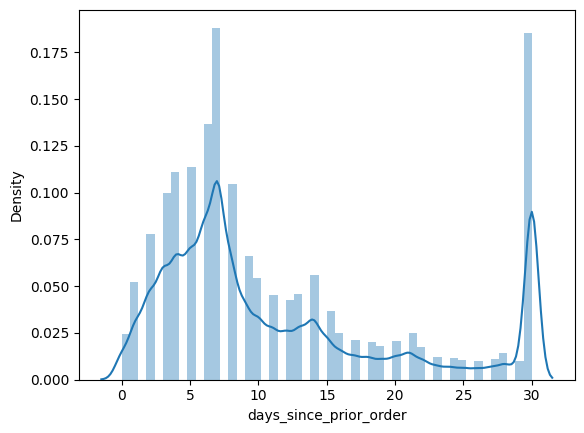

In [23]:
sns.distplot(df['days_since_prior_order'])

In [24]:
df['days_since_prior_order'].fillna(0,inplace=True)
## '0' indicates unknown

In [25]:
df.isnull().sum()

user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [26]:
catogorical_features =[i for i in df.columns if df[i].dtype == 'O']
numerical_features =[i for i in df.columns if df[i].dtype != 'O']

In [27]:
for i in catogorical_features:
    print(i," feature has : ",len(df[i].unique()))

department  feature has :  21
product_name  feature has :  134


In [28]:
def make_dict(list):
    dict = {}
    count=1
    for i in list:
        dict[i] = count
        count+=1
    return dict

In [29]:
for i in catogorical_features:
    dict = make_dict(df[i].unique())
    df[i] = df[i].map(dict)

In [30]:
df.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,49125,1,2,18,0.0,17,1,0,13,1,1
1,49125,1,2,18,0.0,91,2,0,16,2,2
2,49125,1,2,18,0.0,36,3,0,16,2,3
3,49125,1,2,18,0.0,83,4,0,4,3,4
4,49125,1,2,18,0.0,83,5,0,4,3,4


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   department_id           int64  
 9   department              int64  
 10  product_name            int64  
dtypes: float64(1), int64(10)
memory usage: 169.5 MB


# Applying Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

### Dendrogram

In [ ]:
x = df.sample(n=1000)

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.show()

**line with more largest distance vertically without crossing any horizontal line**

-> see vertical distance for k =2 clusters which is high compared to k = 6 clusters , compare vertical distance for k =2 cluster it looks same as k=3 clusters so we conclude that k=3 clusters will be best but k=2 is also best once check with k=2 and k=3

### Applying Hierarchical Clustering

In [32]:
x = df.sample(n=10000)

In [33]:
ag = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels = ag.fit_predict(x)

In [34]:
x['clusters']  = labels
x.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,clusters
1278259,108525,9,0,20,20.0,34,22,1,1,6,75,0
1250071,56014,41,3,17,8.0,53,1,1,16,2,19,1
1572282,189321,12,3,14,5.0,48,9,0,14,9,84,2
1948487,90870,3,6,8,11.0,83,3,1,4,3,4,0
1545439,129474,29,0,22,7.0,83,10,1,4,3,4,0


In [35]:
x['clusters'].value_counts()

0    3610
1    3450
2    2940
Name: clusters, dtype: int64